# Mechanics of Composites (ME60408) - Term Project, Spring 2023-24

*Code created by Mungekar Gaurav Bholanath Madhavi (23ME63R11)*

## Faculty Information
- **Instructor**: Dr. Atul Jain
- **Department**: Department of Mechanical Engineering
- **Institution**: Indian Institute of Technology, Kharagpur

In [186]:
import numpy as np
import sympy as sym
from IPython.display import Math, Latex, Markdown, display
import matplotlib.pyplot as plt

## **List Variables**

In [187]:
#Assign Symbols to Variables
Ef, Em, Gf, Gm  = sym.symbols(r'E_\mathrm{f}, E_\mathrm{m},G_\mathrm{f},G_\mathrm{m}')
nuf, num, vf = sym.symbols(r' \nu_\mathrm{f}, \nu_\mathrm{m}, V_\mathrm{f}')
E1, E2, G12, nu12 = sym.symbols(r'E_\mathrm{1}, E_\mathrm{2}, G_\mathrm{12}, \nu_\mathrm{12}')
theta = sym.symbols(r'\theta')
eps0, kappa, sigmak = sym.symbols(r'\epsilon_\mathrm{0}, \kappa, \sigma_\mathrm{k}')
Xt, Xc, Yt, Yc, S = sym.symbols(r'X_\mathrm{t}, X_\mathrm{c}, Y_\mathrm{t}, Y_\mathrm{c}, S')

## **Enter Data**

In [188]:
# Default values
Ef = 72000.0  # MPa
nuf = 0.22  # No Units
Em = 3000.0  # MPa
num = 0.37  # No Units
vf = 0.45  # No Units
Xt = 100.0  # MPa
Xc = 100.0  # MPa
Yt = 50.0  # MPa
Yc = 50.0  # MPa
S = 25.0  # MPa
laminate = [0, 45, -45, 90, 55, -70] #Degrees each layer angle separated by comma
t_laminate = 1.2  # mm
Nx = 100  # N/m
Ny = 100  # N/m
Nxy = 0  # N/m
Mx = 50  # N.m/m
My = 25  # N.m/m
Mxy = 12  # N.m/m

# Display the values using sympy's Math for LaTeX formatting
display(Math(r'E_f = {:.4f} \, \mathrm{{MPa}}'.format(Ef)))
display(Math(r'\nu_f = {:.2f}'.format(nuf)))
display(Math(r'E_m = {} \, \mathrm{{MPa}}'.format(Em)))
display(Math(r'\nu_m = {:.2f}'.format(num)))
display(Math(r'v_f = {:.2f}'.format(vf)))
display(Math(r'X_t = {} \, \mathrm{{MPa}}'.format(Xt)))
display(Math(r'X_c = {} \, \mathrm{{MPa}}'.format(Xc)))
display(Math(r'Y_t = {} \, \mathrm{{MPa}}'.format(Yt)))
display(Math(r'Y_c = {} \, \mathrm{{MPa}}'.format(Yc)))
display(Math(r'S = {} \, \mathrm{{MPa}}'.format(S)))
display(Math(r'\text{{Laminate Angles = }} {}^\circ'.format(laminate)))
display(Math(r't_{{laminate}} = {} \, \mathrm{{mm}}'.format(t_laminate)))
display(Math(r'N_x = {} \, \mathrm{{N/m}}'.format(Nx)))
display(Math(r'N_y = {} \, \mathrm{{N/m}}'.format(Ny)))
display(Math(r'N_{{xy}} = {} \, \mathrm{{N/m}}'.format(Nxy)))
display(Math(r'M_x = {} \, \mathrm{{N.m/m}}'.format(Mx)))
display(Math(r'M_y = {} \, \mathrm{{N.m/m}}'.format(My)))
display(Math(r'M_{{xy}} = {} \, \mathrm{{N.m/m}}'.format(Mxy)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## **Calculation of Elastic Properties of Laminate & Plots**

In [189]:
# Function to calculate elastic properties of lamina
def calculate_elastic_properties(Ef, Em, vf, nuf, num):
    E1 = vf*Ef + (1-vf)*Em
    E2 = Ef*Em/((1-vf)*Ef + vf*Em)
    Gf = Ef/(2*(1+nuf))
    Gm = Em/(2*(1+num))
    G12 = Gf*Gm/((1-vf)*Gf + vf*Gm)
    nu12 = vf*nuf + (1-vf)*num
    return E1, E2, G12, nu12

In [190]:
#Calculate Elastic Properties
E1, E2, G12, nu12 = calculate_elastic_properties(Ef, Em, vf, nuf, num)
printE1 = r'\text{Longitudinal Stiffness of lamina},\ E_1'; display(Math(f'{printE1} = {E1:.4f} \, \mathrm{{MPa}}'))
printE2 = r'\text{Transverse Stiffness of lamina},\ E_2'; display(Math(f'{printE2} = {E2:.4f} \, \mathrm{{MPa}}'))
printG12 = r'\text{Effective Shear Modulus of lamina},\ G_{{12}}'; display(Math(f'{printG12} = {G12:.4f} \, \mathrm{{MPa}}'))
printNu12 = r'\text{Effective Poissons Ratio of lamina},\ \nu_{{12}}'; display(Math(f'{printNu12} = {nu12:.4f} '))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

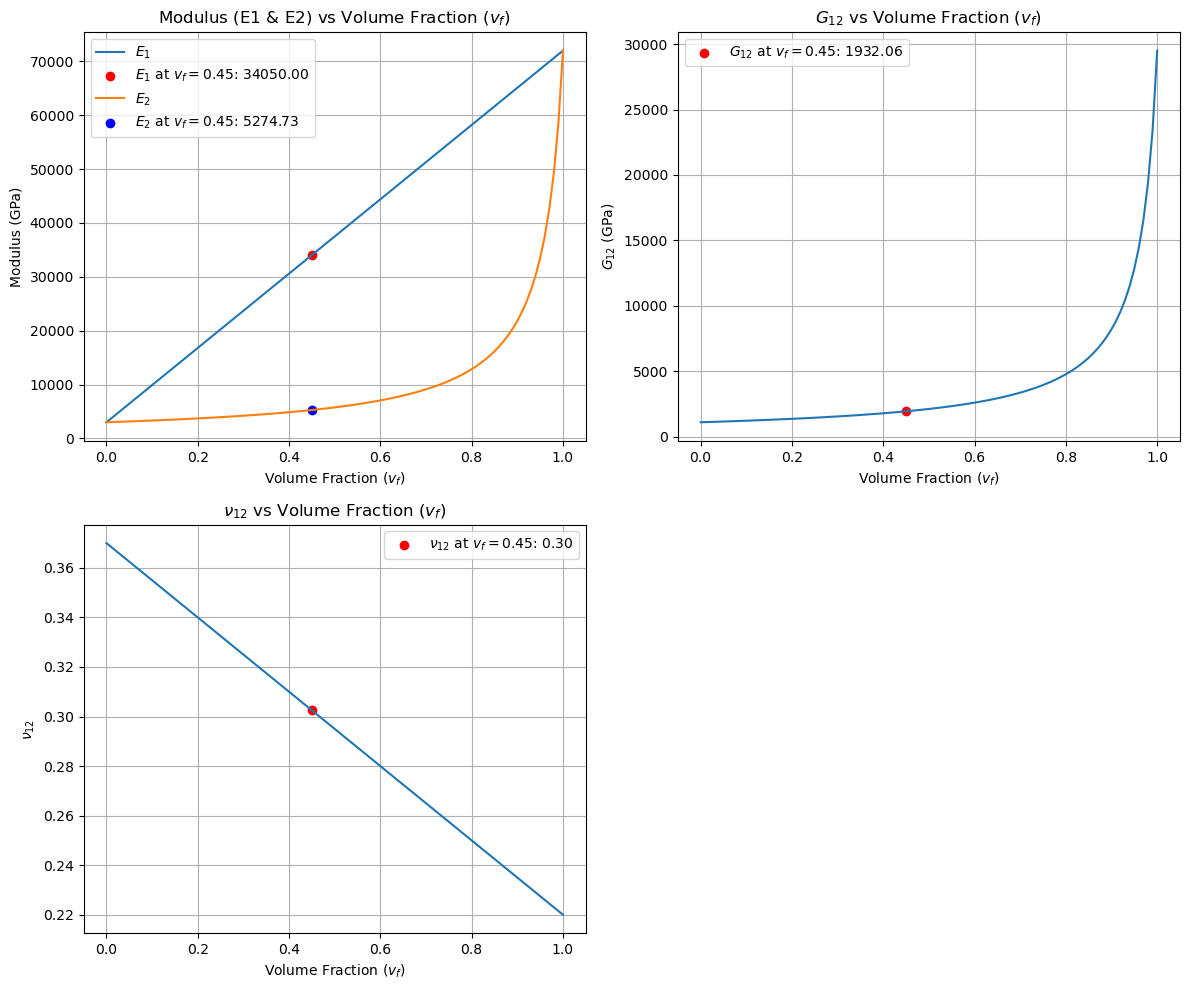

In [191]:
# Plots of Elastic Properties vs Volume Fraction
from scipy.interpolate import interp1d

vf_values = np.linspace(0, 1, 100)  # Values of vf from 0 to 1

# Calculate elastic properties for each value of vf
E1_values = []
E2_values = []
G12_values = []
nu12_values = []
for vf_plot in vf_values:
    E1_plot, E2_plot, G12_plot, nu12_plot = calculate_elastic_properties(Ef, Em, vf_plot, nuf, num)
    E1_values.append(E1_plot)
    E2_values.append(E2_plot)
    G12_values.append(G12_plot)
    nu12_values.append(nu12_plot)

# Interpolate the values to find E1, E2, G12, nu12 at vf_given
interp_func = interp1d(vf_values, E1_values, kind='cubic')
E1_at_vf_045 = interp_func(vf)
interp_func = interp1d(vf_values, E2_values, kind='cubic')
E2_at_vf_045 = interp_func(vf)
interp_func = interp1d(vf_values, G12_values, kind='cubic')
G12_at_vf_045 = interp_func(vf)
interp_func = interp1d(vf_values, nu12_values, kind='cubic')
nu12_at_vf_045 = interp_func(vf)

# Combined plot
plt.figure(figsize=(12, 10))

# Plot E1 vs vf and E2 vs vf
plt.subplot(2, 2, 1)
plt.plot(vf_values, E1_values, label='$E_1$')
plt.scatter(vf, E1_at_vf_045, color='red', marker='o', label=f'$E_1$ at $v_f={vf}$: {E1_at_vf_045:.2f}')
plt.plot(vf_values, E2_values, label='$E_2$')
plt.scatter(vf, E2_at_vf_045, color='blue', marker='o', label=f'$E_2$ at $v_f={vf}$: {E2_at_vf_045:.2f}')
plt.xlabel('Volume Fraction ($v_f$)')
plt.ylabel('Modulus (GPa)')
plt.title('Modulus (E1 & E2) vs Volume Fraction ($v_f$)')
plt.grid(True)
plt.legend()

# Plot G12 vs vf
plt.subplot(2, 2, 2)
plt.plot(vf_values, G12_values)
plt.scatter(vf, G12_at_vf_045, color='red', marker='o', label=f'$G_{{12}}$ at $v_f={vf}$: {G12_at_vf_045:.2f}')
plt.xlabel('Volume Fraction ($v_f$)')
plt.ylabel('$G_{12}$ (GPa)')
plt.title('$G_{12}$ vs Volume Fraction ($v_f$)')
plt.grid(True)
plt.legend()

# Plot nu12 vs vf
plt.subplot(2, 2, 3)
plt.plot(vf_values, nu12_values)
plt.scatter(vf, nu12_at_vf_045, color='red', marker='o', label=f'$\\nu_{{12}}$ at $v_f={vf}$: {nu12_at_vf_045:.2f}')
plt.xlabel('Volume Fraction ($v_f$)')
plt.ylabel('$\\nu_{12}$')
plt.title('$\\nu_{12}$ vs Volume Fraction ($v_f$)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## **Calculation of Q Matrix & Plots**

In [192]:
# Define a Stress Transformation matrix function
def transformation_matrix_stress(theta):
    m = np.cos(theta*np.pi/180)
    n = np.sin(theta*np.pi/180)
    return np.array([
        [m**2, n**2, 2*m*n],
        [n**2, m**2, -2*m*n],
        [-m*n, m*n, m**2-n**2]
    ])

# Define a Strain Transformation matrix function
def transformation_matrix_strain(theta):
    m = np.cos(theta*np.pi/180)
    n = np.sin(theta*np.pi/180)
    return np.array([
        [m**2, n**2, m*n],
        [n**2, m**2, -m*n],
        [-2*m*n, 2*m*n, m**2-n**2]
    ])

# Define a matrix print function
def matprint(A, B, C):
    rounded_B = np.around(B, decimals=8)
    rounded_B[rounded_B == 0.0] = abs(rounded_B[rounded_B == 0.0])
    latex_matrix = r'\begin{bmatrix}' + ''.join([r' & '.join(map(str, row)) + r' \\' for row in rounded_B]) + r'\end{bmatrix}'
    display(Markdown(rf'$${A}={latex_matrix} {C}$$'))

In [193]:
#Compliance Matrix S
SMatrix = np.array([
        [1/E1, -nu12/E1, 0],
        [-nu12/E1, 1/E2, 0],
        [0, 0, 1/G12]
    ])

matprint('\mathrm{Compliance\ Matrix,} \ S_{{local}}',SMatrix,'\mathrm{{MPa}}')

$$\mathrm{Compliance\ Matrix,} \ S_{{local}}=\begin{bmatrix}2.937e-05 & -8.88e-06 & 0.0 \\-8.88e-06 & 0.00018958 & 0.0 \\0.0 & 0.0 & 0.00051758 \\\end{bmatrix} \mathrm{{MPa}}$$

In [194]:
#Local Stiffness Matrix Q(local)
Qlocal = np.linalg.inv(SMatrix)
matprint('\mathrm{Stiffness\ Matrix\ (Local),} \ Q_{{local}}',Qlocal,'\mathrm{{MPa}}')

$$\mathrm{Stiffness\ Matrix\ (Local),} \ Q_{{local}}=\begin{bmatrix}34539.61072825 & 1618.54786198 & 0.0 \\1618.54786198 & 5350.57144457 & 0.0 \\0.0 & 0.0 & 1932.05602962 \\\end{bmatrix} \mathrm{{MPa}}$$

In [195]:
#Global Stiffness Matrix Q_new
def Q_new(Angle):
    T_sigma = transformation_matrix_stress(Angle)
    T_eps = transformation_matrix_strain(Angle)
    return np.dot(np.dot(np.linalg.inv(T_sigma), Qlocal), T_eps)

In [196]:
#Number of Lamina and Thickness of Each Lamina
n = len(laminate)
t = t_laminate/n
display(Math(r'\text{{Number of Layers,}} \ n = {} \,'.format(n)))
display(Math(r'\text{{Thickness of each Lamina,}} \ t = {}'.format(t)))
display(Math(r'\text{{Laminate Angles = }} {}^\circ'.format(laminate)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [197]:
#Global Stiffness Matrix Q(Global)
Q = []

# Iterate over the range of n
for i in range(n):
    # Calculate Q_new for the current iteration
    Q_matrices_i = Q_new(laminate[i])
    
    # Append Q_i to the list of matrices
    Q.append(Q_matrices_i)
    matprint(fr'Q_{{{i+1}}} = Q_{{{laminate[i]}^o}}',Q[i],'\mathrm{{MPa}}')
    

$$Q_{1} = Q_{0^o}=\begin{bmatrix}34539.61072825 & 1618.54786198 & 0.0 \\1618.54786198 & 5350.57144457 & 0.0 \\0.0 & 0.0 & 1932.05602962 \\\end{bmatrix} \mathrm{{MPa}}$$

$$Q_{2} = Q_{45^o}=\begin{bmatrix}12713.87550382 & 8849.76344457 & 7297.25982092 \\8849.76344457 & 12713.87550382 & 7297.25982092 \\7297.25982092 & 7297.25982092 & 9163.27161221 \\\end{bmatrix} \mathrm{{MPa}}$$

$$Q_{3} = Q_{-45^o}=\begin{bmatrix}12713.87550382 & 8849.76344457 & -7297.25982092 \\8849.76344457 & 12713.87550382 & -7297.25982092 \\-7297.25982092 & -7297.25982092 & 9163.27161221 \\\end{bmatrix} \mathrm{{MPa}}$$

$$Q_{4} = Q_{90^o}=\begin{bmatrix}5350.57144457 & 1618.54786198 & 0.0 \\1618.54786198 & 34539.61072825 & 0.0 \\0.0 & 0.0 & 1932.05602962 \\\end{bmatrix} \mathrm{{MPa}}$$

$$Q_{5} = Q_{55^o}=\begin{bmatrix}8568.14733842 & 8003.87191029 & 4533.11331595 \\8003.87191029 & 18551.38673777 & 9181.24909541 \\4533.11331595 & 9181.24909541 & 8317.38007794 \\\end{bmatrix} \mathrm{{MPa}}$$

$$Q_{6} = Q_{-70^o}=\begin{bmatrix}5777.27632761 & 4606.31194916 & -1129.90961283 \\4606.31194916 & 28137.37767085 & -8251.26678227 \\-1129.90961283 & -8251.26678227 & 4919.8201168 \\\end{bmatrix} \mathrm{{MPa}}$$

In [198]:
# Plots of Elastic Properties vs Volume Fraction
from scipy.interpolate import interp1d

theta_values = np.linspace(-180, 180, 1000)  # Values of theta from -180 to 180 degrees

#Calculate Q values
Qxx_values = []
Qyy_values = []
Qss_values = []
Qxy_values = []
Qxs_values = []
Qys_values = []

# Iterate over the range of theta_values
for theta_plot in theta_values:
    Q_plot = Q_new(theta_plot)
    Qxx_values.append(Q_plot[0,0])
    Qyy_values.append(Q_plot[1,1])
    Qss_values.append(Q_plot[2,2])
    Qxy_values.append(Q_plot[0,1])
    Qxs_values.append(Q_plot[0,2])
    Qys_values.append(Q_plot[1,2])

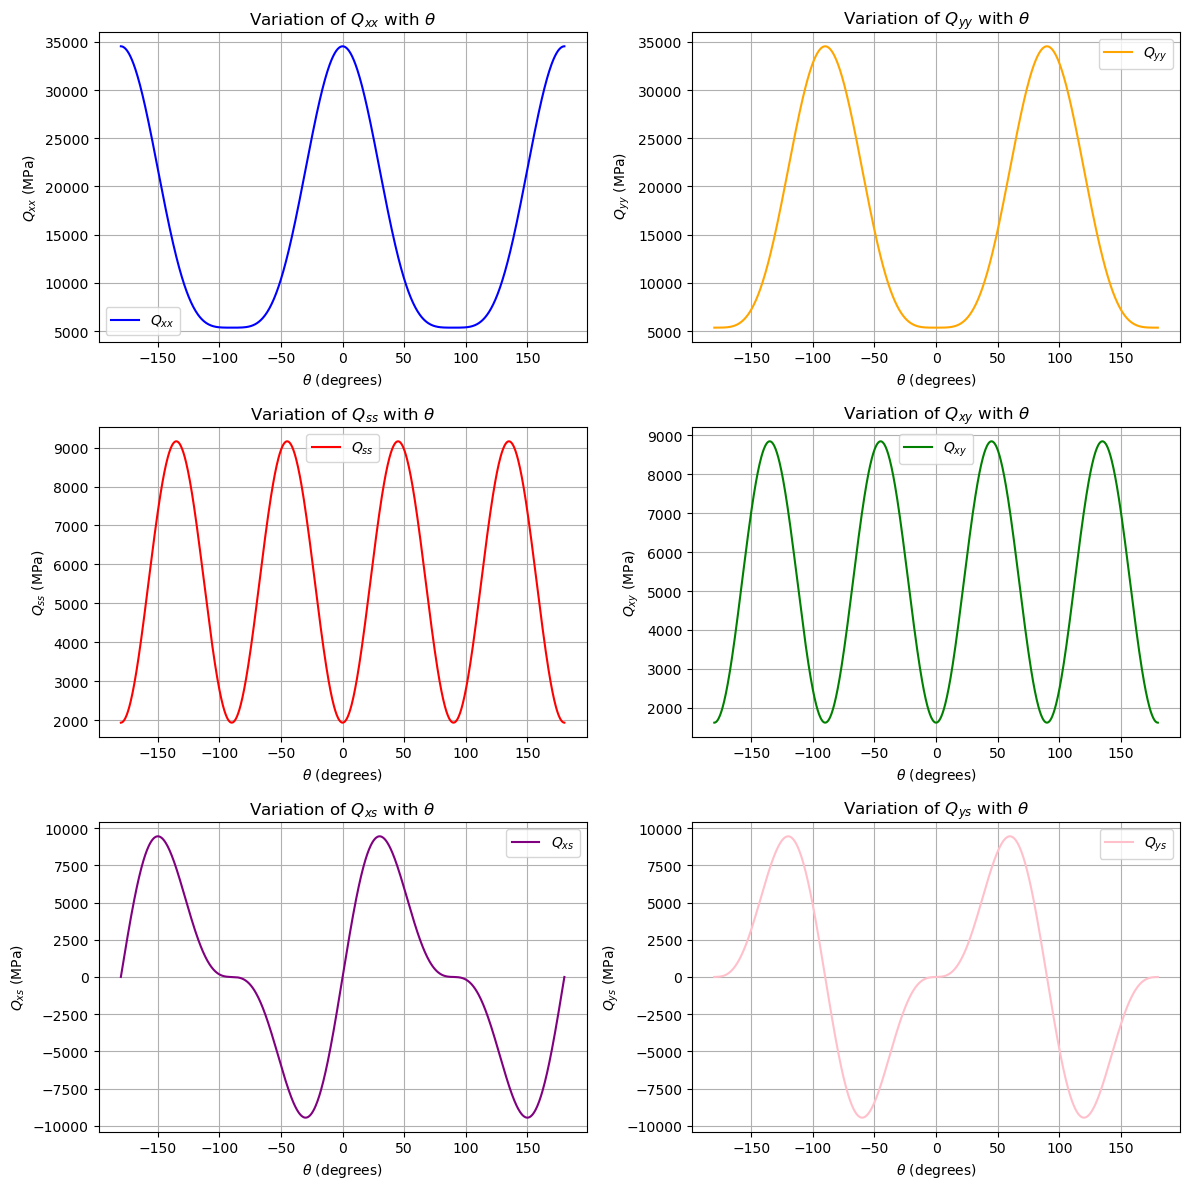

In [199]:
import matplotlib.pyplot as plt

# Create subplots for individual plots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Plot Qxx_values
axes[0, 0].plot(theta_values, Qxx_values, label='$Q_{xx}$', color='blue')
axes[0, 0].set_xlabel(r'$\theta$ (degrees)')
axes[0, 0].set_ylabel('$Q_{xx}$ (MPa)')
axes[0, 0].set_title('Variation of $Q_{xx}$ with $\\theta$')
axes[0, 0].grid(True)
axes[0, 0].legend()

# Plot Qyy_values
axes[0, 1].plot(theta_values, Qyy_values, label='$Q_{yy}$', color='orange')
axes[0, 1].set_xlabel(r'$\theta$ (degrees)')
axes[0, 1].set_ylabel(' $Q_{yy}$ (MPa)')
axes[0, 1].set_title('Variation of $Q_{yy}$ with $\\theta$')
axes[0, 1].grid(True)
axes[0, 1].legend()

# Plot Qss_values
axes[1, 0].plot(theta_values, Qss_values, label='$Q_{ss}$', color='red')
axes[1, 0].set_xlabel(r'$\theta$ (degrees)')
axes[1, 0].set_ylabel('$Q_{ss}$ (MPa)')
axes[1, 0].set_title('Variation of $Q_{ss}$ with $\\theta$')
axes[1, 0].grid(True)
axes[1, 0].legend()

# Plot Qxy_values
axes[1, 1].plot(theta_values, Qxy_values, label='$Q_{xy}$', color='green')
axes[1, 1].set_xlabel(r'$\theta$ (degrees)')
axes[1, 1].set_ylabel('$Q_{xy}$ (MPa)')
axes[1, 1].set_title('Variation of $Q_{xy}$ with $\\theta$')
axes[1, 1].grid(True)
axes[1, 1].legend()

# Plot Qxs_values
axes[2, 0].plot(theta_values, Qxs_values, label='$Q_{xs}$', color='purple')
axes[2, 0].set_xlabel(r'$\theta$ (degrees)')
axes[2, 0].set_ylabel('$Q_{xs}$ (MPa)')
axes[2, 0].set_title('Variation of $Q_{xs}$ with $\\theta$')
axes[2, 0].grid(True)
axes[2, 0].legend()

# Plot Qys_values
axes[2, 1].plot(theta_values, Qys_values, label='$Q_{ys}$', color='pink')
axes[2, 1].set_xlabel(r'$\theta$ (degrees)')
axes[2, 1].set_ylabel('$Q_{ys}$ (MPa)')
axes[2, 1].set_title('Variation of $Q_{ys}$ with $\\theta$')
axes[2, 1].grid(True)
axes[2, 1].legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


##

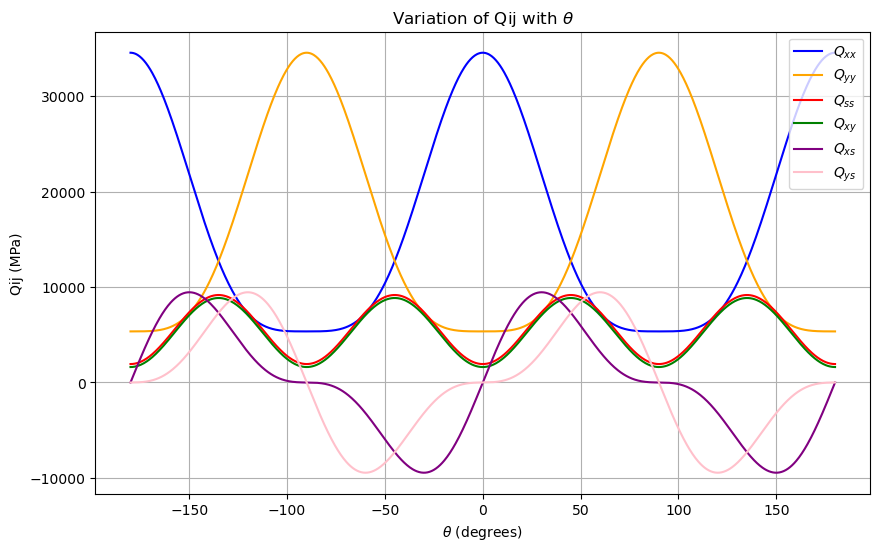

In [200]:
import matplotlib.pyplot as plt

# Combined plot
plt.figure(figsize=(10, 6))

plt.plot(theta_values, Qxx_values, label='$Q_{xx}$', color='blue')
plt.plot(theta_values, Qyy_values, label='$Q_{yy}$', color='orange')
plt.plot(theta_values, Qss_values, label='$Q_{ss}$', color='red')
plt.plot(theta_values, Qxy_values, label='$Q_{xy}$', color='green')
plt.plot(theta_values, Qxs_values, label='$Q_{xs}$', color='purple')
plt.plot(theta_values, Qys_values, label='$Q_{ys}$', color='pink')

# Set labels and title
plt.xlabel('$\\theta$ (degrees)')
plt.ylabel('Qij (MPa)')
plt.title('Variation of Qij with $\\theta$')
plt.grid(True)
plt.legend()
plt.show()

## **Calculation of A, B, D, ABD, $\varepsilon^o$ and $\kappa$ Matrix**

In [201]:
# Z Co-ordinates (Thickness) Array
z = []
for i in range(n+1):
    zi = round(-t * (n / 2) + i * t,8)
    z.append(zi)

# Print the list z
print("z:", z)

z: [-0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6]


In [202]:
# A Matrix
A = np.zeros((3, 3))
for i in range(n):
    A = A + Q[i]*(z[i+1]-z[i])
    
matprint('\mathrm{Laminate\ Membrane\ Stiffness,} \ A',A,'\mathrm{{MPa-mm}}')

$$\mathrm{Laminate\ Membrane\ Stiffness,} \ A=\begin{bmatrix}15932.6713693 & 6709.36129451 & 680.64074062 \\6709.36129451 & 22401.33951781 & 185.99646263 \\680.64074062 & 185.99646263 & 7085.57109568 \\\end{bmatrix} \mathrm{{MPa-mm}}$$

In [203]:
# B Matrix
B = np.zeros((3, 3))
for i in range(n):
    B = B + Q[i]*((z[i+1])**2-(z[i])**2)

B = B/2
matprint('\mathrm{Laminate\ Bending\ Stiffness,} \ B',B,'\mathrm{{MPa-mm^2}}')

$$\mathrm{Laminate\ Bending\ Stiffness,} \ B=\begin{bmatrix}-3272.24321117 & 103.39860501 & -132.89455516 \\103.39860501 & 3065.44600115 & -566.14212534 \\-132.89455516 & -566.14212534 & 103.39860501 \\\end{bmatrix} \mathrm{{MPa-mm^2}}$$

In [204]:
# D Matrix
D = np.zeros((3, 3))

for i in range(n):
    D = D + Q[i]*((z[i+1])**3-(z[i])**3)

D = D/3
matprint('\mathrm{Membrane-Bending\  Coupling\ Stiffness,} \ D',D,'\mathrm{{MPa-mm^3}}')

$$\mathrm{Membrane-Bending\  Coupling\ Stiffness,} \ D=\begin{bmatrix}2488.15856241 & 657.90958721 & 144.12551865 \\657.90958721 & 2406.35028031 & -129.92471005 \\144.12551865 & -129.92471005 & 703.05476335 \\\end{bmatrix} \mathrm{{MPa-mm^3}}$$

## Calculation of ABD Matrix ##

$$
\text{ABD Matrix} = 
\begin{bmatrix}
[A] & [B] \\
[B] & [D]
\end{bmatrix}
$$

In [205]:
#ABD Matrix (6x6 Matrix)
ABD = np.block([[A, B], [B, D]])
matprint('\mathrm{ABD\ Matrix}',ABD,'Units')

$$\mathrm{ABD\ Matrix}=\begin{bmatrix}15932.6713693 & 6709.36129451 & 680.64074062 & -3272.24321117 & 103.39860501 & -132.89455516 \\6709.36129451 & 22401.33951781 & 185.99646263 & 103.39860501 & 3065.44600115 & -566.14212534 \\680.64074062 & 185.99646263 & 7085.57109568 & -132.89455516 & -566.14212534 & 103.39860501 \\-3272.24321117 & 103.39860501 & -132.89455516 & 2488.15856241 & 657.90958721 & 144.12551865 \\103.39860501 & 3065.44600115 & -566.14212534 & 657.90958721 & 2406.35028031 & -129.92471005 \\-132.89455516 & -566.14212534 & 103.39860501 & 144.12551865 & -129.92471005 & 703.05476335 \\\end{bmatrix} Units$$

## Calculation of a,b,c,d Matrix ##

$$
\text{abcd Matrix} = 
\begin{bmatrix}
[A] & [B] \\
[B] & [D]
\end{bmatrix}^{-1}
\ = 
\begin{bmatrix}
[a] & [b] \\
[c] & [d]
\end{bmatrix}
$$

In [206]:
#abcd Matrix (6x6 Matrix)
abcd = np.linalg.inv(ABD)
matprint('\mathrm{abcd\ Matrix}',abcd,'Units')

$$\mathrm{abcd\ Matrix}=\begin{bmatrix}0.00010606 & -3.244e-05 & -6.6e-06 & 0.00014417 & -6.13e-06 & -3.579e-05 \\-3.244e-05 & 6.56e-05 & -5.6e-06 & -2.855e-05 & -7.354e-05 & 3.978e-05 \\-6.6e-06 & -5.6e-06 & 0.00014545 & -1.13e-05 & 4.382e-05 & -1.673e-05 \\0.00014417 & -2.855e-05 & -1.13e-05 & 0.00064243 & -0.00015648 & -0.00015469 \\-6.13e-06 & -7.354e-05 & 4.382e-05 & -0.00015648 & 0.00056638 & 6.992e-05 \\-3.579e-05 & 3.978e-05 & -1.673e-05 & -0.00015469 & 6.992e-05 & 0.00149473 \\\end{bmatrix} Units$$

In [207]:
#a,b,c,d Matrix (3x3 Matrices)
aMatrix = abcd[:3, :3]
bMatrix = abcd[:3, 3:]
cMatrix = abcd[3:, :3]
dMatrix = abcd[3:, 3:]
matprint('[a]',aMatrix,'mm^{{-1}}MPa^{{-1}}')
matprint('[b]',bMatrix,'mm^{{-2}}MPa^{{-1}}')
matprint('[c]',cMatrix,'mm^{{-2}}MPa^{{-1}}')
matprint('[d]',dMatrix,'mm^{{-3}}MPa^{{-1}}')

$$[a]=\begin{bmatrix}0.00010606 & -3.244e-05 & -6.6e-06 \\-3.244e-05 & 6.56e-05 & -5.6e-06 \\-6.6e-06 & -5.6e-06 & 0.00014545 \\\end{bmatrix} mm^{{-1}}MPa^{{-1}}$$

$$[b]=\begin{bmatrix}0.00014417 & -6.13e-06 & -3.579e-05 \\-2.855e-05 & -7.354e-05 & 3.978e-05 \\-1.13e-05 & 4.382e-05 & -1.673e-05 \\\end{bmatrix} mm^{{-2}}MPa^{{-1}}$$

$$[c]=\begin{bmatrix}0.00014417 & -2.855e-05 & -1.13e-05 \\-6.13e-06 & -7.354e-05 & 4.382e-05 \\-3.579e-05 & 3.978e-05 & -1.673e-05 \\\end{bmatrix} mm^{{-2}}MPa^{{-1}}$$

$$[d]=\begin{bmatrix}0.00064243 & -0.00015648 & -0.00015469 \\-0.00015648 & 0.00056638 & 6.992e-05 \\-0.00015469 & 6.992e-05 & 0.00149473 \\\end{bmatrix} mm^{{-3}}MPa^{{-1}}$$

In [208]:
#N and M Vector (3x1 Vector)
NM_Matrix = np.array([[Nx/10**3], [Ny/10**3], [Nxy/10**3], [Mx], [My], [Mxy]])
N_matrix = NM_Matrix[:3]
M_matrix = NM_Matrix[3:]

matprint('\mathrm{{Force\ Vector,\ }} N',N_matrix,'N/mm')
matprint('\mathrm{{Moment\ Vector,\ }} M',M_matrix,'N.mm/mm')
matprint('\mathrm{{NM}} ',NM_Matrix,'Units')

$$\mathrm{{Force\ Vector,\ }} N=\begin{bmatrix}0.1 \\0.1 \\0.0 \\\end{bmatrix} N/mm$$

$$\mathrm{{Moment\ Vector,\ }} M=\begin{bmatrix}50.0 \\25.0 \\12.0 \\\end{bmatrix} N.mm/mm$$

$$\mathrm{{NM}} =\begin{bmatrix}0.1 \\0.1 \\0.0 \\50.0 \\25.0 \\12.0 \\\end{bmatrix} Units$$

## Calculation of $\epsilon^o$ and $\kappa$ Matrix ##

$$
\begin{Bmatrix}
[\epsilon^o] \\
[\kappa]
\end{Bmatrix}
\ = 
\begin{bmatrix}
[a] & [b] \\
[c] & [d]
\end{bmatrix}
\begin{Bmatrix}
[N] \\
[M]
\end{Bmatrix}
$$

In [209]:
#eps and kappa Vector (3x1 Vector)
ek_matrix = np.dot(abcd, NM_Matrix)

eps0 = ek_matrix[:3]
kappa = ek_matrix[3:]
matprint('\mathrm{{Mid\ Surface\ Strain \ OR\ In\ plane\ Strain \ OR\ Membrane \ Strain, }} \ \epsilon^o',eps0,'')
matprint('\mathrm{{Mid\ Surface\ Curvatures, }} \ \kappa',kappa,'')
matprint('\mathrm{{\epsilon^o \kappa \ Vector}}',ek_matrix,'')

$$\mathrm{{Mid\ Surface\ Strain \ OR\ In\ plane\ Strain \ OR\ Membrane \ Strain, }} \ \epsilon^o=\begin{bmatrix}0.00663304 \\-0.00278528 \\0.00032866 \\\end{bmatrix} $$

$$\mathrm{{Mid\ Surface\ Curvatures, }} \ \kappa=\begin{bmatrix}0.02636455 \\0.00716668 \\0.01195067 \\\end{bmatrix} $$

$$\mathrm{{\epsilon^o \kappa \ Vector}}=\begin{bmatrix}0.00663304 \\-0.00278528 \\0.00032866 \\0.02636455 \\0.00716668 \\0.01195067 \\\end{bmatrix} $$

## **Calculation of $\sigma_{{global}}$ and $\sigma_{{local}}$ Matrix**

In [210]:
# Stress Matrix (x-y) for each lamina (Global)

sigmak = {}
for i in range(n):
    sigmak_raw = np.dot(Q[i],eps0 + ((z[i+1]+z[i])/2)*kappa)
    sigmak[i] = sigmak_raw
    matprint(fr'\sigma^{{{i+1}}}_{{Global}}',sigmak[i],'MPa')

$$\sigma^{1}_{Global}=\begin{bmatrix}-236.51580302 \\-44.67598142 \\-10.90969827 \\\end{bmatrix} MPa$$

$$\sigma^{2}_{Global}=\begin{bmatrix}-83.66690672 \\-97.80553963 \\-75.16827616 \\\end{bmatrix} MPa$$

$$\sigma^{3}_{Global}=\begin{bmatrix}26.14317618 \\-2.83200477 \\-11.54870403 \\\end{bmatrix} MPa$$

$$\sigma^{4}_{Global}=\begin{bmatrix}46.2489756 \\-56.4458752 \\2.94391669 \\\end{bmatrix} MPa$$

$$\sigma^{5}_{Global}=\begin{bmatrix}137.25880114 \\140.54443329 \\92.64279681 \\\end{bmatrix} MPa$$

$$\sigma^{6}_{Global}=\begin{bmatrix}111.03175683 \\61.71496772 \\2.03996496 \\\end{bmatrix} MPa$$

In [211]:
# Stress Matrix (1-2) for each lamina (Local)
sigmak_12 = {}
for i in range(n):
    sigmak_12[i] = np.dot(transformation_matrix_stress(laminate[i]),sigmak[i])
    matprint(fr'\sigma^{{{i+1}}}_{{Local}}',sigmak_12[i],'MPa')

$$\sigma^{1}_{Local}=\begin{bmatrix}-236.51580302 \\-44.67598142 \\-10.90969827 \\\end{bmatrix} MPa$$

$$\sigma^{2}_{Local}=\begin{bmatrix}-165.90449933 \\-15.56794701 \\-7.06931645 \\\end{bmatrix} MPa$$

$$\sigma^{3}_{Local}=\begin{bmatrix}23.20428973 \\0.10688167 \\14.48759047 \\\end{bmatrix} MPa$$

$$\sigma^{4}_{Local}=\begin{bmatrix}-56.4458752 \\46.2489756 \\-2.94391669 \\\end{bmatrix} MPa$$

$$\sigma^{5}_{Local}=\begin{bmatrix}226.51924594 \\51.28398849 \\-30.1419605 \\\end{bmatrix} MPa$$

$$\sigma^{6}_{Local}=\begin{bmatrix}66.17267195 \\106.5740526 \\14.28740667 \\\end{bmatrix} MPa$$

## **Stress $\sigma_{{k}}$ vs thickness of laminate Plots**

In [212]:
# Calculate Stress Values Array for plotting
from scipy.interpolate import interp1d

z_values = np.linspace(z[0], z[n], 1000) 

#Sigma Values
SigmaX_values = []
SigmaY_values = []
SigmaXY_values = []

# Iterate over the range of n
for z_plot in z_values:
    # Find the index where the value would be inserted
    if np.searchsorted(z, z_plot, side='left')<=0:
        i = 0
    else:
        i = np.searchsorted(z, z_plot, side='left')-1
    
    Sigma_plot = np.dot(Q[i],eps0 + z_plot*kappa)
    SigmaX_values.append(Sigma_plot[0,0])
    SigmaY_values.append(Sigma_plot[1,0])
    SigmaXY_values.append(Sigma_plot[2,0])

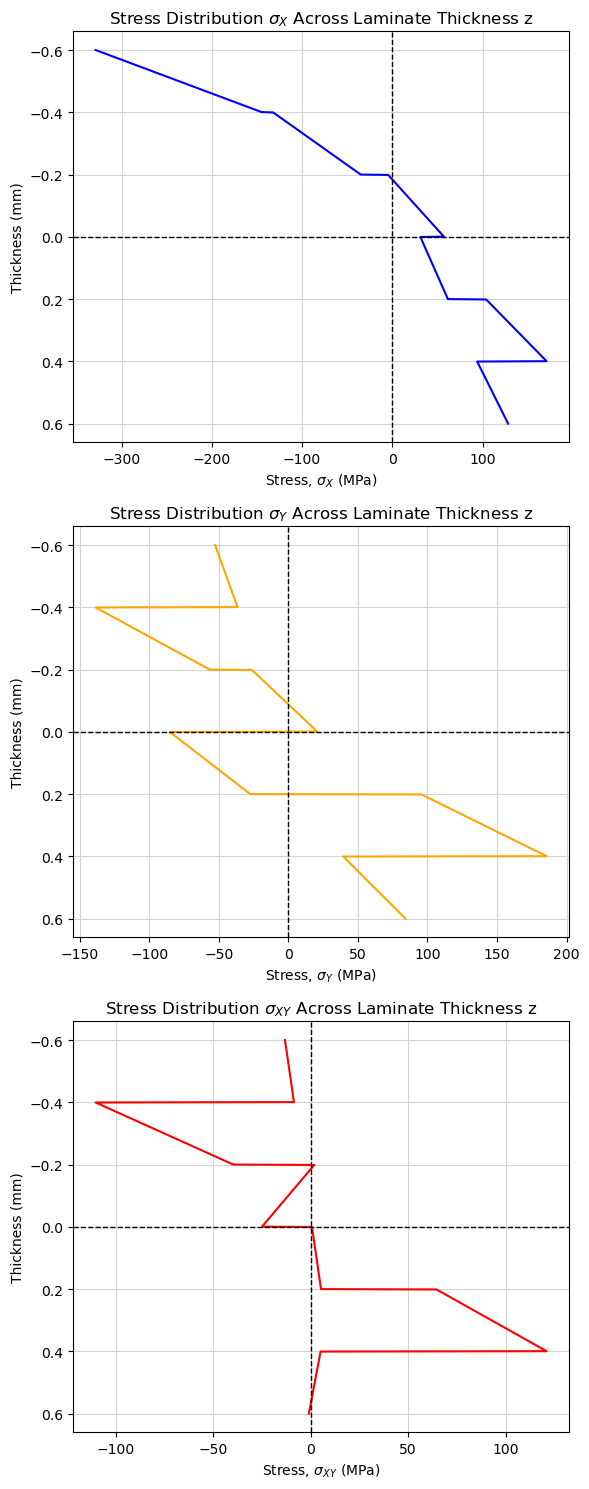

In [213]:
#Stress vs Thickness Plotting
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(6, 15))

# Plot sigma_X
axes[0].plot(SigmaX_values, z_values, color='blue')
axes[0].set_xlabel(r'Stress, $\sigma_{X}$ (MPa)')
axes[0].set_ylabel('Thickness (mm)')
axes[0].set_title('Stress Distribution $\sigma_{X}$ Across Laminate Thickness z')
axes[0].grid(True, color='lightgray')
axes[0].axhline(0, color='black', lw=1, linestyle='--')
axes[0].axvline(0, color='black', lw=1, linestyle='--')
axes[0].set_yticks(sorted(set(z)))
axes[0].invert_yaxis()

# Plot sigma_Y
axes[1].plot(SigmaY_values, z_values, color='orange')
axes[1].set_xlabel(r'Stress, $\sigma_{Y}$ (MPa)')
axes[1].set_ylabel('Thickness (mm)')
axes[1].set_title('Stress Distribution $\sigma_{Y}$ Across Laminate Thickness z')
axes[1].grid(True, color='lightgray')
axes[1].axhline(0, color='black', lw=1, linestyle='--')
axes[1].axvline(0, color='black', lw=1, linestyle='--')
axes[1].set_yticks(sorted(set(z)))
axes[1].invert_yaxis()

# Plot sigma_XY
axes[2].plot(SigmaXY_values, z_values, color='red')
axes[2].set_xlabel(r'Stress, $\sigma_{XY}$ (MPa)')
axes[2].set_ylabel('Thickness (mm)')
axes[2].set_title('Stress Distribution $\sigma_{XY}$ Across Laminate Thickness z')
axes[2].grid(True, color='lightgray')
axes[2].axhline(0, color='black', lw=1, linestyle='--')
axes[2].axvline(0, color='black', lw=1, linestyle='--')
axes[2].set_yticks(sorted(set(z)))
axes[2].invert_yaxis()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

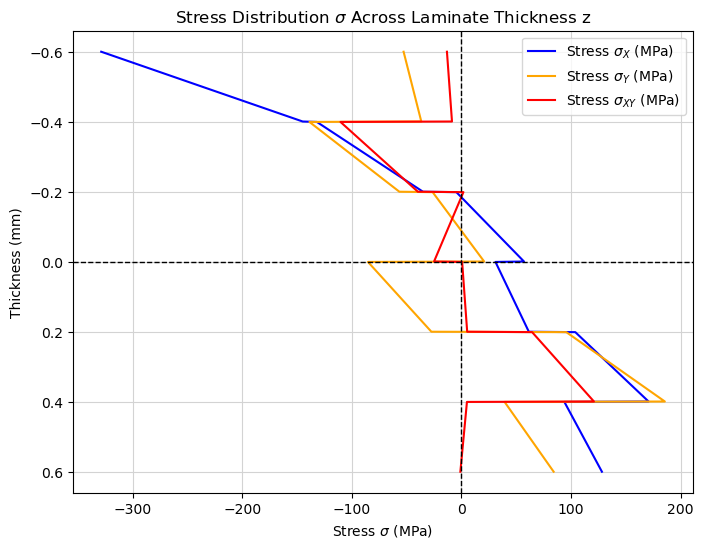

In [214]:
# Combined plot of all stresses vs thickness
plt.figure(figsize=(8, 6))
plt.plot(SigmaX_values, z_values, label='Stress $\sigma_{X}$ (MPa)', color='blue')
plt.plot(SigmaY_values, z_values, label='Stress $\sigma_{Y}$ (MPa)', color='orange')
plt.plot(SigmaXY_values, z_values, label='Stress $\sigma_{XY}$ (MPa)', color='red')
plt.grid(True, color='lightgray')
plt.axhline(0, color='black', lw=1, linestyle='--')
plt.axvline(0, color='black', lw=1, linestyle='--')
plt.xlabel('Stress $\sigma$ (MPa)')
plt.ylabel('Thickness (mm)')
plt.title('Stress Distribution $\sigma$ Across Laminate Thickness z')
plt.grid(True)
plt.legend()
plt.gca().invert_yaxis()
plt.show()

##

## **Strain $\varepsilon$ vs thickness of laminate Plots**

In [215]:
# Calculate Strain Values Array for plotting
from scipy.interpolate import interp1d

z_values = np.linspace(z[0], z[n], 10)

#Strain Matrix eps
epsX_values = []
epsY_values = []
epsXY_values = []

# Iterate over the range of n
for z_plot in z_values:
    eps_plot = eps0 + z_plot*kappa
    epsX_values.append(eps_plot[0,0])
    epsY_values.append(eps_plot[1,0])
    epsXY_values.append(eps_plot[2,0])

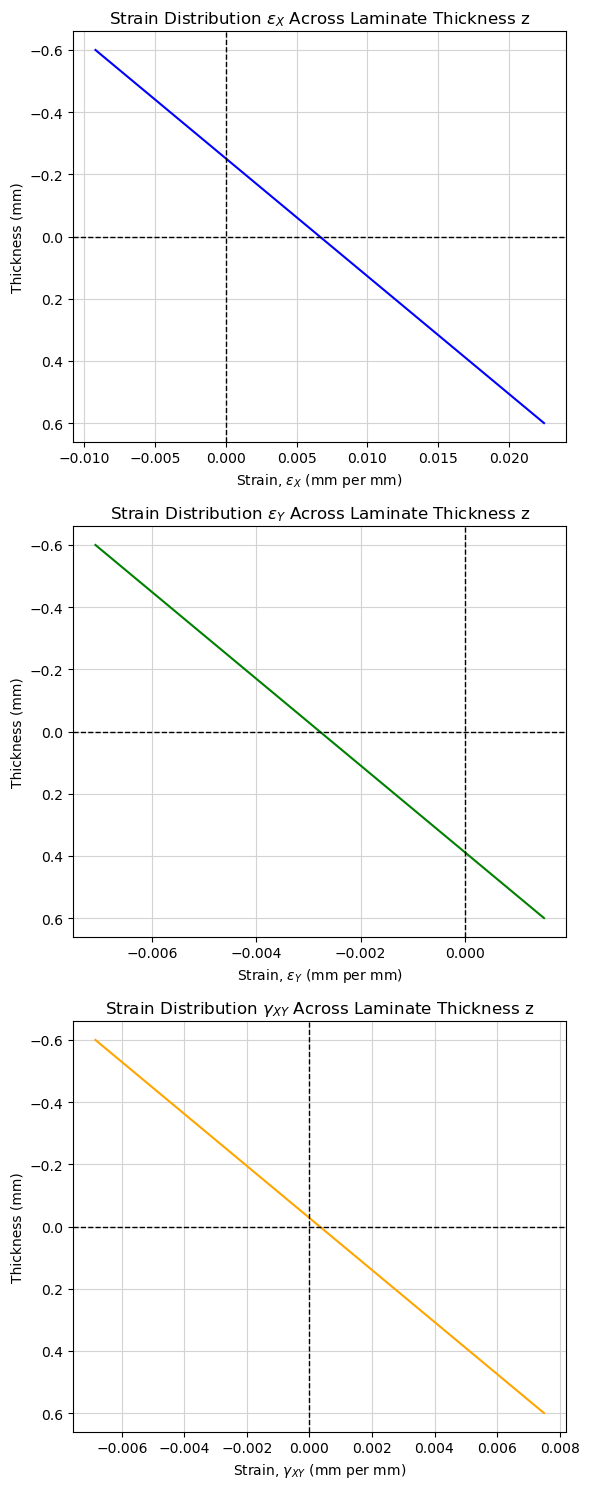

In [216]:
#Strain vs Thickness Plotting
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(6, 15))

# Plot eps_X
axes[0].plot(epsX_values, z_values, color='blue')
axes[0].set_xlabel(r'Strain, $\epsilon_{X}$ (mm per mm)')
axes[0].set_ylabel('Thickness (mm)')
axes[0].set_title('Strain Distribution $\epsilon_{X}$ Across Laminate Thickness z')
axes[0].grid(True, color='lightgray')
axes[0].axhline(0, color='black', lw=1, linestyle='--')
axes[0].axvline(0, color='black', lw=1, linestyle='--')
axes[0].set_yticks(sorted(set(z)))
axes[0].invert_yaxis()

# Plot eps_Y
axes[1].plot(epsY_values, z_values, color='green')
axes[1].set_xlabel(r'Strain, $\epsilon_{Y}$ (mm per mm)')
axes[1].set_ylabel('Thickness (mm)')
axes[1].set_title('Strain Distribution $\epsilon_{Y}$ Across Laminate Thickness z')
axes[1].grid(True, color='lightgray')
axes[1].axhline(0, color='black', lw=1, linestyle='--')
axes[1].axvline(0, color='black', lw=1, linestyle='--')
axes[1].set_yticks(sorted(set(z)))
axes[1].invert_yaxis()

# Plot eps_XY
axes[2].plot(epsXY_values, z_values, color='orange')
axes[2].set_xlabel(r'Strain, $\gamma_{XY}$ (mm per mm)')
axes[2].set_ylabel('Thickness (mm)')
axes[2].set_title('Strain Distribution $\gamma_{XY}$ Across Laminate Thickness z')
axes[2].grid(True, color='lightgray')
axes[2].axhline(0, color='black', lw=1, linestyle='--')
axes[2].axvline(0, color='black', lw=1, linestyle='--')
axes[2].set_yticks(sorted(set(z)))
axes[2].invert_yaxis()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

##

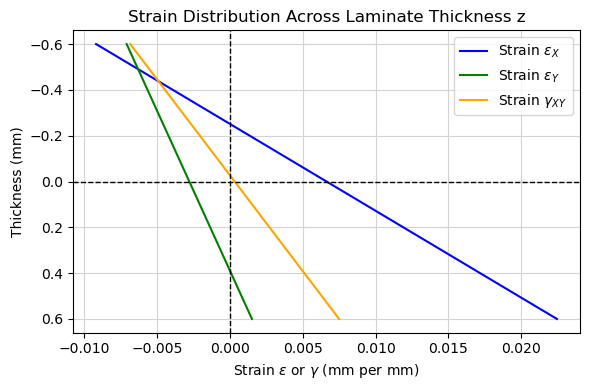

In [217]:
# Combined plot of all Strains vs thickness
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed (smaller)
plt.plot(epsX_values, z_values, label='Strain $\epsilon_{X}$', color='blue')
plt.plot(epsY_values, z_values, label='Strain $\epsilon_{Y}$', color='green')
plt.plot(epsXY_values, z_values, label='Strain $\gamma_{XY}$', color='orange')
plt.grid(True, color='lightgray')
plt.axhline(0, color='black', lw=1, linestyle='--')
plt.axvline(0, color='black', lw=1, linestyle='--')
plt.xlabel('Strain $\epsilon$ or $\gamma$ (mm per mm)')
plt.ylabel('Thickness (mm)')
plt.title('Strain Distribution Across Laminate Thickness z')
plt.grid(True)
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()  # Adjust the layout
plt.show()

##


## **Stiffness Qij vs thickness of laminate Plots**

In [218]:
# Calculate Q Values Array for plotting
from scipy.interpolate import interp1d

z_values = np.linspace(z[0], z[n], 1000)

#tiffness Matrix Q
Qxxz_values = []
Qyyz_values = []
Qssz_values = []
Qxyz_values = []
Qxsz_values = []
Qysz_values = []


for z_plot in z_values:
    # Find the index where the value would be inserted
    if np.searchsorted(z, z_plot, side='left')<=0:
        i = 0
    else:
        i = np.searchsorted(z, z_plot, side='left')-1
    Q_plot = Q[i]
    Qxxz_values.append(Q_plot[0,0])
    Qyyz_values.append(Q_plot[1,1])
    Qssz_values.append(Q_plot[2,2])
    Qxyz_values.append(Q_plot[0,1])
    Qxsz_values.append(Q_plot[0,2])
    Qysz_values.append(Q_plot[1,2])    

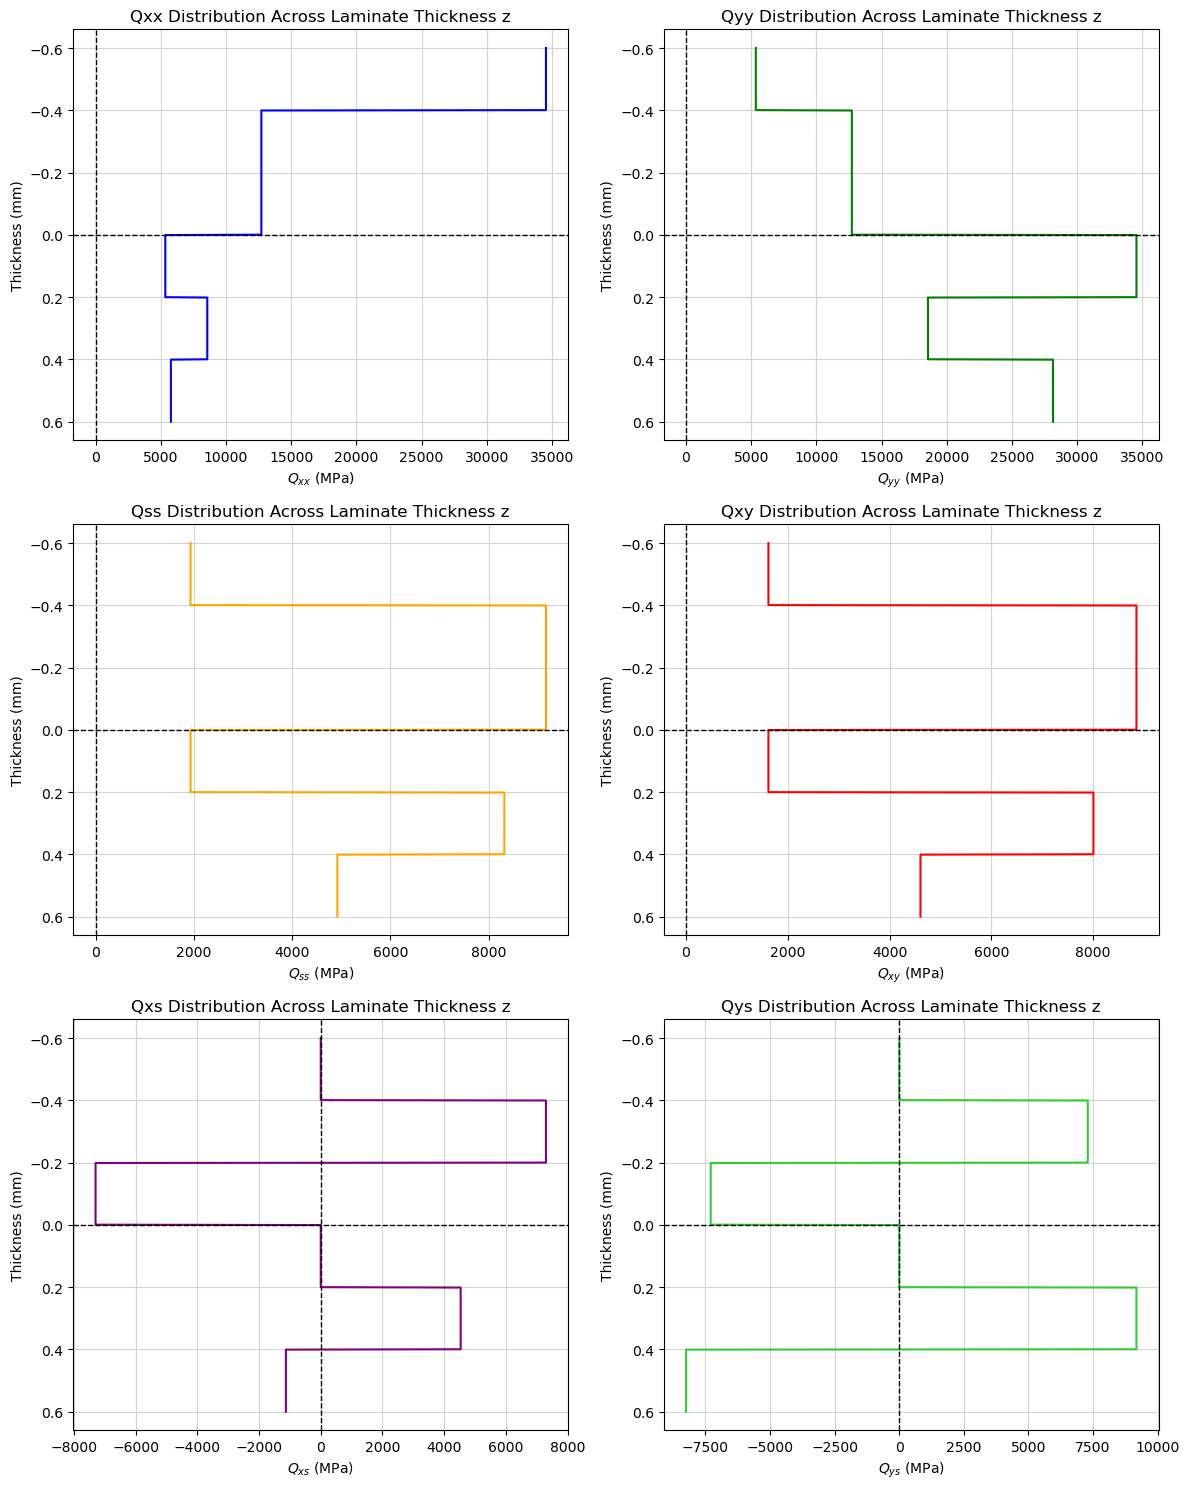

In [219]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Plot Qxx
axes[0, 0].plot(Qxxz_values, z_values, color='blue')
axes[0, 0].set_xlabel('$Q_{xx}$ (MPa)')
axes[0, 0].set_ylabel('Thickness (mm)')
axes[0, 0].set_title('Qxx Distribution Across Laminate Thickness z')
axes[0, 0].grid(True, color='lightgray')
axes[0, 0].axhline(0, color='black', lw=1, linestyle='--')
axes[0, 0].axvline(0, color='black', lw=1, linestyle='--')
axes[0, 0].set_yticks(sorted(set(z)))
axes[0, 0].invert_yaxis()

# Plot Qyy
axes[0, 1].plot(Qyyz_values, z_values, color='green')
axes[0, 1].set_xlabel('$Q_{yy}$ (MPa)')
axes[0, 1].set_ylabel('Thickness (mm)')
axes[0, 1].set_title('Qyy Distribution Across Laminate Thickness z')
axes[0, 1].grid(True, color='lightgray')
axes[0, 1].axhline(0, color='black', lw=1, linestyle='--')
axes[0, 1].axvline(0, color='black', lw=1, linestyle='--')
axes[0, 1].set_yticks(sorted(set(z)))
axes[0, 1].invert_yaxis()

# Plot Qss
axes[1, 0].plot(Qssz_values, z_values, color='orange')
axes[1, 0].set_xlabel('$Q_{ss}$ (MPa)')
axes[1, 0].set_ylabel('Thickness (mm)')
axes[1, 0].set_title('Qss Distribution Across Laminate Thickness z')
axes[1, 0].grid(True, color='lightgray')
axes[1, 0].axhline(0, color='black', lw=1, linestyle='--')
axes[1, 0].axvline(0, color='black', lw=1, linestyle='--')
axes[1, 0].set_yticks(sorted(set(z)))
axes[1, 0].invert_yaxis()

# Plot Qxy
axes[1, 1].plot(Qxyz_values, z_values, color='red')
axes[1, 1].set_xlabel('$Q_{xy}$ (MPa)')
axes[1, 1].set_ylabel('Thickness (mm)')
axes[1, 1].set_title('Qxy Distribution Across Laminate Thickness z')
axes[1, 1].grid(True, color='lightgray')
axes[1, 1].axhline(0, color='black', lw=1, linestyle='--')
axes[1, 1].axvline(0, color='black', lw=1, linestyle='--')
axes[1, 1].set_yticks(sorted(set(z)))
axes[1, 1].invert_yaxis()

# Plot Qxs
axes[2, 0].plot(Qxsz_values, z_values, color='purple')
axes[2, 0].set_xlabel('$Q_{xs}$ (MPa)')
axes[2, 0].set_ylabel('Thickness (mm)')
axes[2, 0].set_title('Qxs Distribution Across Laminate Thickness z')
axes[2, 0].grid(True, color='lightgray')
axes[2, 0].axhline(0, color='black', lw=1, linestyle='--')
axes[2, 0].axvline(0, color='black', lw=1, linestyle='--')
axes[2, 0].set_yticks(sorted(set(z)))
axes[2, 0].invert_yaxis()

# Plot Qys
axes[2, 1].plot(Qysz_values, z_values, color='limegreen')
axes[2, 1].set_xlabel('$Q_{ys}$ (MPa)')
axes[2, 1].set_ylabel('Thickness (mm)')
axes[2, 1].set_title('Qys Distribution Across Laminate Thickness z')
axes[2, 1].grid(True, color='lightgray')
axes[2, 1].axhline(0, color='black', lw=1, linestyle='--')
axes[2, 1].axvline(0, color='black', lw=1, linestyle='--')
axes[2, 1].set_yticks(sorted(set(z)))
axes[2, 1].invert_yaxis()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

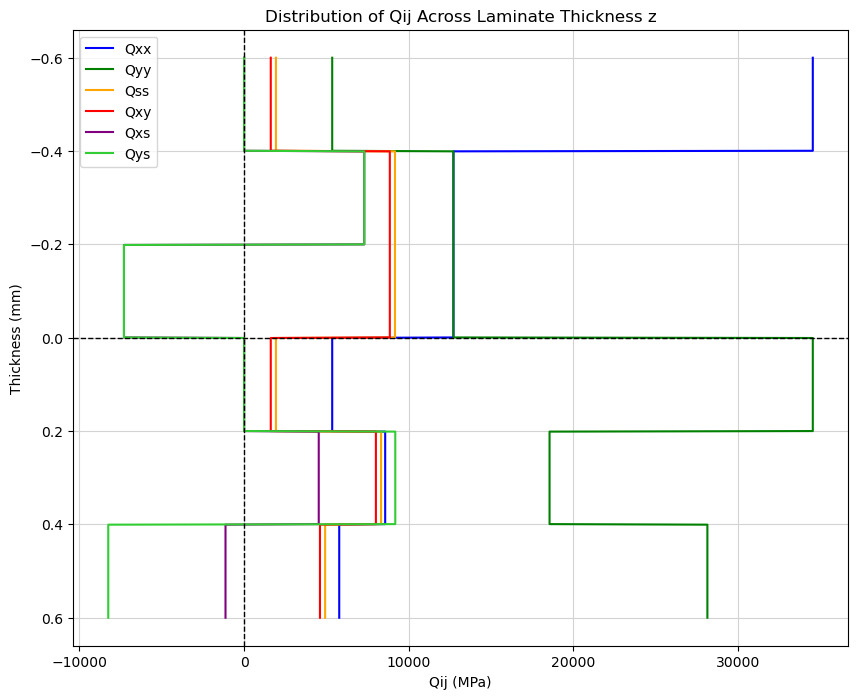

In [220]:
import matplotlib.pyplot as plt

# Create combined plot
plt.figure(figsize=(10, 8))
plt.plot(Qxxz_values, z_values, label='Qxx', color='blue')
plt.plot(Qyyz_values, z_values, label='Qyy', color='green')
plt.plot(Qssz_values, z_values, label='Qss', color='orange')
plt.plot(Qxyz_values, z_values, label='Qxy', color='red')
plt.plot(Qxsz_values, z_values, label='Qxs', color='purple')
plt.plot(Qysz_values, z_values, label='Qys', color='limegreen')

# Set labels and title
plt.xlabel('Qij (MPa)')
plt.ylabel('Thickness (mm)')
plt.title('Distribution of Qij Across Laminate Thickness z')
plt.grid(True, color='lightgray')
plt.axhline(0, color='black', lw=1, linestyle='--')
plt.axvline(0, color='black', lw=1, linestyle='--')
plt.yticks(sorted(set(z)))
plt.gca().invert_yaxis()  # Invert y-axis to show thickness increasing downwards
plt.legend()

# Show plot
plt.show()

## **Hoffman Criteria to check failure of each lamina**

In [221]:
#Calculation of coefficients in Hoffman Formula
F1, F11, F2, F22, F66, F12 = sym.symbols(r'F_\mathrm{1}, F_\mathrm{11}, F_\mathrm{2}, F_\mathrm{22}, F_\mathrm{66}, F_\mathrm{12}')
F1 = 1/Xt - 1/Xc
F11 = 1/(Xt*Xc)
F2 = 1/Yt - 1/Yc
F22 = 1/(Yt*Yc)
F66 = 1/S**2
F12 = -1/(2*Xt*Xc)

display(Math(r'F_1 = {:.8g} \, \mathrm{{MPa^{{-1}}}}'.format(round(F1, 8))))
display(Math(r'F_{{11}} = {:.8g} \, \mathrm{{MPa^{{-2}}}}'.format(round(F11, 8))))
display(Math(r'F_2 = {:.8g} \, \mathrm{{MPa^{{-1}}}}'.format(round(F2, 8))))
display(Math(r'F_{{22}} = {:.8g} \, \mathrm{{MPa^{{-2}}}}'.format(round(F22, 8))))
display(Math(r'F_{{66}} = {:.8g} \, \mathrm{{MPa^{{-2}}}}'.format(round(F66, 8))))
display(Math(r'F_{{12}} = {:.8g} \, \mathrm{{MPa^{{-2}}}}'.format(round(F12, 8))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [222]:
#Hoffman Factor for each layer
import pandas as pd

F_values = []
safety_status = []

# Calculate F values and safety status for each layer
for i in range(n):
    F = F1*sigmak_12[i][0][0]+F2*sigmak_12[i][1][0]+F11*sigmak_12[i][0][0]**2+F22*sigmak_12[i][1][0]**2+2*F12*sigmak_12[i][0][0]*sigmak_12[i][1][0]+F66*sigmak_12[i][2][0]**2
    F_values.append(F)
    if F < 1:
        safety_status.append("Safe")
    else:
        safety_status.append("Not Safe")

# Create a DataFrame to store the results
df = pd.DataFrame({
    'Layer': [i+1 for i in range(n)],
    'Hoffman Factor (F)': F_values,
    'Safety Status': safety_status
})

# Display the DataFrame with increased column space
print(df.to_string(index=False, col_space=20))

               Layer   Hoffman Factor (F)        Safety Status
                   1             5.526127             Not Safe
                   2             2.671056             Not Safe
                   3             0.389425                 Safe
                   4             1.449124             Not Safe
                   5             6.475095             Not Safe
                   6             4.602473             Not Safe


## **Calculation of Margin of Safety of each Lamina and Laminate**

In [223]:
#Margin of Safety for each Lamina
MoS = []
a_val = []
b_val = []
c_val = []
for i in range(n):
    a = F11*sigmak_12[i][0][0]**2+F22*sigmak_12[i][1][0]**2+2*F12*sigmak_12[i][0][0]*sigmak_12[i][1][0]+F66*sigmak_12[i][2][0]**2
    b = F1*sigmak_12[i][0][0]+F2*sigmak_12[i][1][0]
    c = -1
    SR = (-b + sym.sqrt(b**2 - 4*a*c)) / (2*a)
    MoS.append(SR)
    a_val.append(a)
    b_val.append(b)
    c_val.append(c)

df = pd.DataFrame({
    'Layer': [i+1 for i in range(n)],'a': a_val,'b': b_val,'c': c_val,
    'MoS': MoS
})
print(df.to_string(index=False, col_space=20))

real_MoS = [x for x in MoS if np.isreal(x) and not isinstance(x, sym.core.add.Add)]

# Check if there are any real values
if real_MoS:
    # Find the minimum real FoS value
    min_MoS = min(real_MoS)
    print()
    display(Math(r'\mathrm{{Margin\ of\ Safety\ of\ Laminate}} = {:.8g}'.format(round(min_MoS, 8))))
else:
    print("All values are complex numbers or sympy.Add objects. Cannot compute minimum MoS.")

               Layer                    a                    b                    c                  MoS
                   1             5.526127                 -0.0                   -1    0.425392257480897
                   2             2.671056                 -0.0                   -1    0.611869096230833
                   3             0.389425                  0.0                   -1     1.60246346469800
                   4             1.449124                  0.0                   -1    0.830705823211941
                   5             6.475095                  0.0                   -1    0.392985854539731
                   6             4.602473                  0.0                   -1    0.466127137776239



<IPython.core.display.Math object>

---

***End of Program***